# INFO 1998 Final Project

Alyssa Yoon (agy8), Iram Liu (il233), Sydney Ho (sh967)

## Introduction

Our project aims to analyze the many factors that leads to student debt in the United States using various machine learning skills we have learned throughout this class. The three big questions we seek to answer are:

1. What factors affect the average debt racked up by university students in the United States?

2. Based on the key factors, how can we predict whether a college will have similar debt to other colleges?

3. How confidently can we predict if a student will be able to repay their student debts?


## Data:

### Sources:
Our data set was from the US Department of Education and can be found at the following link:
https://collegescorecard.ed.gov/data/

Since this data set was massive, with almost 3,000 columns, we went through the categories manually and selected features we qualitively thought would help us test our hypothesis. There was also data from every year since 1996 but, we chose to use the latest data since it was the most relevant and also the most complete. 

### Key For the Columns: 


`INSTNM`: Institution Name

`CONTROL`: Type of Institution (1:Public, 2: Private Non-Profit, 3: Private Profit)

`LOCALE`: Classification of Location of the University

`ADM_RATE`: Admission Rates

`SAT_AVG`: Average Cumulative SAT Score

`ACTCMMID`: Average Cumulative ACT Score

`COMP_ORIG_YR4_RT`: Percent of Undergraduates that Graduate In 4 Years

`COSTT4-A`: Average Cost of Attendance 

`PCTPELL`: Percent of Undergraduates who Receive the Pell Grant

`PCTFLOAN`: Percent of Undergraduates who Receive Federal Student Loan

`UGDS`: Total Number of Undergraduates

`GRAD_DEBT_MDN`: Median Debt After Graduation

`COUNT_NWNE_3YR`: Number of Graduates Not Working 3 Years After Completion

`COUNT_WNE_3YR`: Number of Graduates Working 3 Years After Completion

`CDR2`: Rate of Graduates who begin repayment 2 years after completion

`CDR3`: Rate of Graduates who begin repayment 3 years after completion

`PAR_ED_PCT_PS`: Percent of Parents who attended post-secondary institution

`FAMINC`: Average Family Income



In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import cluster
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

In [2]:
# Filtering all warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Raw Data
df = pd.read_csv('Most-Recent-Cohorts-Institution.csv')
print(df.shape)

# Rewrite Dataframe so that it only contains columns we selected
df = df[['INSTNM','CONTROL','LOCALE','ADM_RATE','ACTCMMID','SAT_AVG','COMP_ORIG_YR4_RT','COSTT4_A','PCTFLOAN','PCTPELL',
         'UGDS','GRAD_DEBT_MDN','COUNT_NWNE_3YR','COUNT_WNE_3YR',
         'CDR2','CDR3','PAR_ED_PCT_PS','FAMINC']]
print(df.shape)

(6694, 2989)
(6694, 18)


In [4]:
df.head()

,INSTNM,CONTROL,LOCALE,ADM_RATE,ACTCMMID,SAT_AVG,COMP_ORIG_YR4_RT,COSTT4_A,PCTFLOAN,PCTPELL,UGDS,GRAD_DEBT_MDN,COUNT_NWNE_3YR,COUNT_WNE_3YR,CDR2,CDR3,PAR_ED_PCT_PS,FAMINC
0,Alabama A & M University,1,12.0,0.9175,17.0,939.0,0.210526315789,23053.0,0.7361,0.7019,5271.0,31000,16.0,495.0,0.114,0.176,0.6341719078,32362.826114
1,University of Alabama at Birmingham,1,12.0,0.7366,26.0,1234.0,0.461707585196,24495.0,0.4798,0.3512,13328.0,22250,111.0,2294.0,0.060,0.063,0.658776329,51306.674306
2,Amridge University,2,12.0,NaN,NaN,NaN,0.162962962963,14800.0,0.7009,0.6382,365.0,31417,6.0,30.0,0.071,0.159,0.4875,21079.472973
3,University of Alabama in Huntsville,1,12.0,0.8257,28.0,1319.0,0.464680851064,23917.0,0.3976,0.2536,7785.0,21450,52.0,1124.0,0.077,0.065,0.6898678414,61096.588949
4,Alabama State University,1,12.0,0.9690,17.0,946.0,0.237909516381,21866.0,0.8232,0.7627,3750.0,31000,18.0,579.0,0.132,0.180,0.6565656566,31684.382188


In [5]:
# Number of NaN values in each column
print(df.isnull().sum())

INSTNM                 0
CONTROL                0
LOCALE               505
ADM_RATE            4706
ACTCMMID            5442
SAT_AVG             5416
COMP_ORIG_YR4_RT     256
COSTT4_A            3333
PCTFLOAN             843
PCTPELL              843
UGDS                 792
GRAD_DEBT_MDN        134
COUNT_NWNE_3YR       425
COUNT_WNE_3YR        891
CDR2                1376
CDR3                 892
PAR_ED_PCT_PS        623
FAMINC               623
dtype: int64


In [6]:
# Descriptive statistics
df.describe()

,CONTROL,LOCALE,ADM_RATE,ACTCMMID,SAT_AVG,COSTT4_A,PCTFLOAN,PCTPELL,UGDS,COUNT_NWNE_3YR,COUNT_WNE_3YR,CDR2,CDR3
count,6694.000000,6189.000000,1988.000000,1252.000000,1278.000000,3361.000000,5851.000000,5851.000000,5902.000000,6269.000000,5803.000000,5318.000000,5802.000000
mean,2.076337,19.937793,0.689655,23.418530,1139.942097,27548.361500,0.447511,0.460693,2559.643511,97.620514,1284.183870,0.086947,0.108755
std,0.833519,9.663463,0.220990,3.980236,130.128843,16379.050764,0.278265,0.215682,5801.780841,306.083141,3228.656923,0.068429,0.074317
min,1.000000,-3.000000,0.000000,10.000000,737.000000,4108.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,12.000000,0.562725,21.000000,1053.000000,14272.000000,0.204500,0.299400,108.000000,8.000000,121.000000,0.035000,0.051000
50%,2.000000,21.000000,0.726700,23.000000,1118.000000,22731.000000,0.499600,0.438300,475.000000,24.000000,361.000000,0.077000,0.100000
75%,3.000000,22.000000,0.852550,25.000000,1204.000000,36828.000000,0.666700,0.615400,2151.500000,78.000000,1067.000000,0.128000,0.152000
max,3.000000,43.000000,1.000000,36.000000,1557.000000,78555.000000,1.000000,1.000000,98630.000000,5039.000000,46488.000000,1.000000,0.694000


The dataset we will use has 6,694 entries and 20 features, some quantitative and others qualitative, which we want to convert to something more usable. Since there were null values and 'PrivacySuppressed' values, we had to decide whether to exclude them or insert a value. 

## Data Cleaning and Preprocessing

1. For Locale: There were 12 possible values for this category from the raw data but to simplify it, we changed the assingment to 1 for any sized city, 2 for any sized suburb, 3 for any size town, and 4 for a rural location. Since we couldn't just put in an average for the location, we decided to replace NaN values with 0. 

2. For all other features with PrivacySuppressed Values, we first convert to NaN. Then for all NaN values, we put in the mean. 


3. For GRAD_DEBT_MDN, we dummy encoded this column so that we could use it in our classification models. We decided that a median debt of < 10k would be considered low debt and assigned to 0. A median debt of >= 10k would be considered high debt and assigned to 1.

In [7]:
# Cleaning

# Replacing PrivacySuppressed with NaN
df['COMP_ORIG_YR4_RT'] = df['COMP_ORIG_YR4_RT'].replace('PrivacySuppressed', np.nan).astype(float)
df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float)
df['PAR_ED_PCT_PS'] = df['PAR_ED_PCT_PS'].replace('PrivacySuppressed', np.nan).astype(float)
df['FAMINC'] = df['FAMINC'].replace('PrivacySuppressed', np.nan).astype(float)

# LOCALE
df['LOCALE'] = df['LOCALE'].fillna(0)
for x in range(0,len(df)):
    if df['LOCALE'][x]== 11 or df['LOCALE'][x]==12 or df['LOCALE'][x]==13:
        df['LOCALE'][x]=1
    elif df['LOCALE'][x]== 21 or df['LOCALE'][x]==22 or df['LOCALE'][x]==23:
        df['LOCALE'][x]=2
    elif df['LOCALE'][x]== 11 or df['LOCALE'][x]==12 or df['LOCALE'][x]==13:
        df['LOCALE'][x]=3
    elif df['LOCALE'][x]== 11 or df['LOCALE'][x]==12 or df['LOCALE'][x]==13:
        df['LOCALE'][x]=4

column_names = ['ADM_RATE', 'ACTCMMID', 'SAT_AVG',
       'COMP_ORIG_YR4_RT', 'COSTT4_A', 'PCTFLOAN', 'PCTPELL',
       'UGDS', 'GRAD_DEBT_MDN', 'COUNT_NWNE_3YR', 'COUNT_WNE_3YR', 'CDR2',
       'CDR3', 'PAR_ED_PCT_PS', 'FAMINC']
for x in column_names:
    mean = df[x].mean()
    df[x] = df[x].fillna(mean)


## Data Visualization

First, we'll be looking at a correlation plot which shows us the correlation coefficient for every possible combination pairs of variables. We'll mainly be using the data across the row with `GRAD_DEBT_MDN` to see how it compares to every factor.

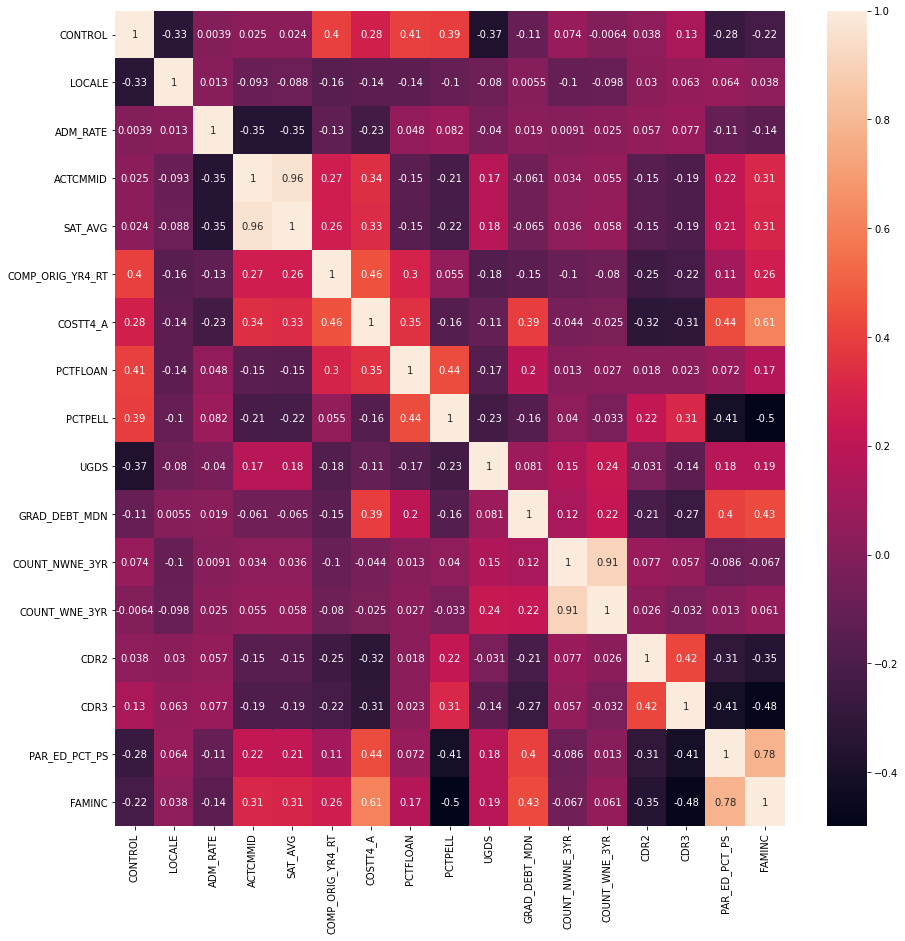

In [8]:
# Correlation plot 

corr = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

The correlation plot shows that there is high positive correlation between post-grad median debt and these factors: percantage of parents who attended post-secondary institution, average family income, and average cost of attendance.
Next, we will graph a scatter plot comparing post-grad median debt and the largest factor (average family income).

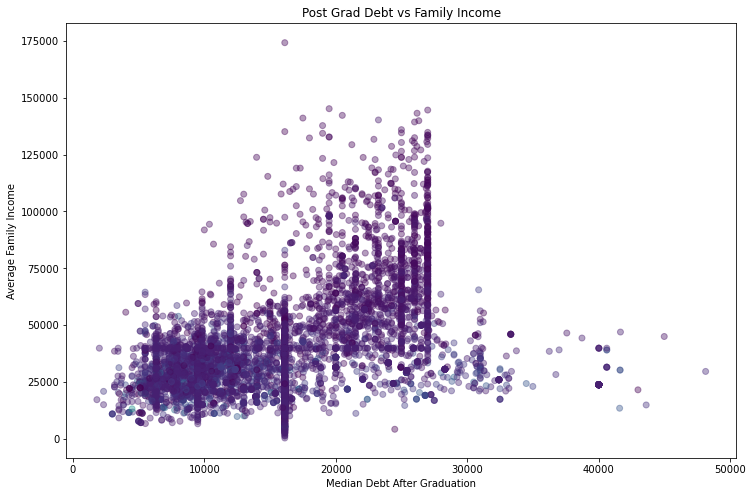

In [9]:
# Scatter plot

fig = plt.figure(figsize=(12, 8))
plt.scatter(df['GRAD_DEBT_MDN'],df['FAMINC'],c=df['CDR2'], alpha=0.4) 
# Colored by species of graduates who begin repayment 2 years after completion
# Transparency to see areas of high density

plt.title('Post Grad Debt vs Family Income')
plt.xlabel('Median Debt After Graduation')
plt.ylabel('Average Family Income')

plt.show()

## Regression Model

In [10]:
df_regression = df.copy()

In [11]:
# Separate target (X) and features (Y) and train test split data with 20% being used for testing
X = df_regression.drop(['INSTNM','CONTROL','LOCALE','ADM_RATE','ACTCMMID','SAT_AVG','COMP_ORIG_YR4_RT','PCTFLOAN','PCTPELL',
         'UGDS','GRAD_DEBT_MDN','COUNT_NWNE_3YR','COUNT_WNE_3YR',
         'CDR2','CDR3'], axis=1)
Y = df_regression['GRAD_DEBT_MDN']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Predict median debt after graduation using linear regression
regression = LinearRegression()
regression.fit(x_train, y_train)

pred_test = regression.predict(x_test)

In [13]:
# Print model score
print('Score: ', regression.score(x_test, y_test))

Score:  0.22419004648153784


In [14]:
# Print regression model variables
print(regression.coef_)
print(regression.intercept_)

[1.35632586e-01 1.13600395e+04 4.92107742e-02]
4140.515678013768


### Linear Regression Model Expression

$$ debt = 1.35632586^{-01}\cdot x_{1} + 113600395e^{04}\cdot x_{2} + 4.92107742e^{-02} \cdot x_{3} $$

$debt$ = predicted debt


$x_{1}$ = total cost of attendance


$x_{2}$ = percent of parents who attended post-secondary institution


$x_{3}$ = average family income

## Clustering Model

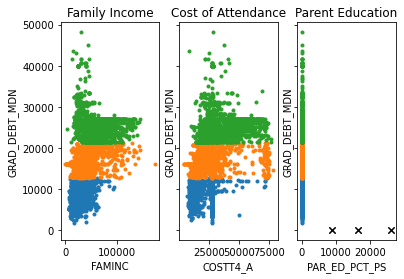

In [15]:
# Clustering by K-Means
plt1_data= df[['GRAD_DEBT_MDN','FAMINC','CONTROL']]
plt2_data= df[['GRAD_DEBT_MDN','COSTT4_A','CONTROL']]
plt3_data= df[['GRAD_DEBT_MDN','PAR_ED_PCT_PS','CONTROL']]

k = len(plt1_data['CONTROL'].unique())
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(plt1_data)
kmeans.fit(plt2_data)
kmeans.fit(plt3_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# Median Debt After Graduation Plotted Against Average Family Income
for i in range(k):
    # select only data observations from the applicable cluster
    ds = plt1_data.iloc[np.where(labels==i)]
    # plot the data observations
    ax1.plot(ds[['FAMINC']],ds[['GRAD_DEBT_MDN']],'.')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    ax1.set_title("Family Income")
    ax1.set_xlabel('FAMINC')
    ax1.set_ylabel('GRAD_DEBT_MDN') 
    
# Median Debt After Graduation Plotted Against Average Cost Of Attendance
for i in range(k):
    # select only data observations from the applicable cluster
    ds = plt2_data.iloc[np.where(labels==i)]
    # plot the data observations
    ax2.plot(ds[['COSTT4_A']],ds[['GRAD_DEBT_MDN']],'.')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    ax2.set_title("Cost of Attendance")
    ax2.set_xlabel('COSTT4_A')
    ax2.set_ylabel('GRAD_DEBT_MDN')
    
# Median Debt After Graduation Plotted Against Percent of Parents who attended post-secondary institution
for i in range(k):
    # select only data observations from the applicable cluster
    ds = plt3_data.iloc[np.where(labels==i)]
    # plot the data observations
    ax3.plot(ds[['PAR_ED_PCT_PS']],ds[['GRAD_DEBT_MDN']],'.')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    ax3.set_title("Parent Education")
    ax3.set_xlabel('PAR_ED_PCT_PS')
    ax3.set_ylabel('GRAD_DEBT_MDN')

plt.show()

Blue = Public

Orange = Private Non Profit

Green = Private For Profit

## Classification Model

In [16]:
# GRAD_DEBT_MDN Cleansing
# We seperated this part because we wanted to see the correlation in the scatter and cluster 
# plots before changing up our df for the classification. 
for x in range(0, len(df)):
    if df['GRAD_DEBT_MDN'][x] >= 10000:
        df['GRAD_DEBT_MDN'][x] = 0
    else:
        df['GRAD_DEBT_MDN'][x] = 1

df['GRAD_DEBT_MDN'] = df['GRAD_DEBT_MDN'].astype(int)

df['GRAD_DEBT_MDN'].sum()

1670

In [17]:
# Separate X (features) and Y (target) and train test split the data with 20% being used for testing
X = df.drop(['INSTNM','CONTROL','LOCALE','ADM_RATE','ACTCMMID','SAT_AVG','COMP_ORIG_YR4_RT','PCTFLOAN','PCTPELL',
         'UGDS','GRAD_DEBT_MDN','COUNT_NWNE_3YR','COUNT_WNE_3YR',
         'CDR2','CDR3'], axis=1)
Y = df['GRAD_DEBT_MDN']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Classify debt level with KNN Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

print("Training Accuracy: ", accuracy_score(y_train, pred_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_test))

Training Accuracy:  0.8425770308123249
Test Accuracy:  0.7781926811053025


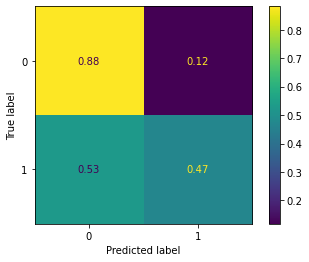

In [19]:
plot_confusion_matrix(knn, x_test, y_test, normalize='true')

In [20]:
# Find accuracy of the model with each value of k from 1-30 inclusive
best_k = 1
best_test_acc = 0
best_train_acc = 0
accuracy = []

for k in range(1, 31):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    pred_test = knn.predict(x_test)
    pred_train = knn.predict(x_train)
    test_acc = accuracy_score(y_test, pred_test)
    train_acc = accuracy_score(y_train, pred_train)
    accuracy.append(test_acc)
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_k = k

print("Best k: ", best_k)
print("Best Test Accuracy ", best_test_acc)
print("Best Train Accuracy ", best_train_acc)

Best k:  6
Best Test Accuracy  0.7893950709484691
Best Train Accuracy  0.8274509803921568


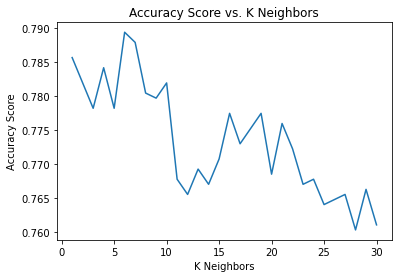

In [21]:
# Create plot of accuracy array
plt.plot(range(1,31), accuracy)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs. K Neighbors")
plt.show()

## Analysis

Based on the output of the correlation matrix, we decided that the features with the highest correlation to the median debt after graduation were the average cost of attendance, percent of parents who attended post-secondary institution, and average family income. Therefore, we based on models on these three features.

First, we used a linear regression model to predict median debt after graduation. We fitted the selected features with highest correlation to debt and generated an expression for predictions. However, we scored this model and found that it had a low score of 0.224.

Using the K-Means clustering techniques, we were able to see three distinct groups of colleges that share very similar features with regards to the three features mentioned above since the shapes of all three subplots are pretty close.

The classification model classifies the debt level after graduation using the features determined to have the highest correlation. We either classify debt as low debt (< 10k) or high debt (>= 10k) to convert  `GRAD_DEBT_MDN` into categorical data.

We fit our data to a KNN model with the default value of 5 neighbors, getting a training accuracy of 0.843 and a test accuracy of 0.778. We also plotted a confusion matrix to look deeper into how well our KNN model accurately classified debt level. We discovered that our model worked well in classifying low debt as low debt, but was evenly split when classifying high debt.

After viewing the results from the confusion matrix, we decided to see if we could improve the accuracy of our KNN model by optimizing the amount of neighbors. We found that the optimal number of neighbors is 6 where the train accuracy was 0.789 and the test accuracy was 0.827. Although the train accuracy decreased by 5.4%, the test accuracy increased by 4.9%. We plotted another confusion matrix for the optimized model, finding that our model became slightly better at accurately classifying low debt, but that the accuracy for classifying high debt decreased by ~10%.

## Conclusion

Thus, we found that our linear regression poorly predicts median debt after graduation. Our clustering model can accurately classify the type of college based on debt level. Our classification model can confidently predict debt level, though it is much better at predicting low debt than high debt. This could have multiple underlying causes, like selection bias or the cutoff in which we decided what would be considered low and high debt. In the future, we could continue applying other classification models to see if better accuracies are produced and to better classify debt level.

Some future adjustments and improvements we can make towards our models are to impute more accurate data for our missing entries. Not every college revealed all their data so there was a good amount of information we had to fill in. By using Deep Learning for the more categorical features and k-NN for the quantitative entries, we will be able to create a more complete dataset allowing our model to better capture the correlations between the features and the average debt. 